In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
sentiment=pd.read_csv(r'C:\Users\91858\Desktop\ALL FILES\Sentiment_Stock_data.csv')

In [3]:
sentiment.head(10)

,Unnamed: 0,Sentiment,Sentence
0,0,0,"According to Gran , the company has no plans t..."
1,1,1,"For the last quarter of 2010 , Componenta 's n..."
2,2,1,"In the third quarter of 2010 , net sales incre..."
3,3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1,"Operating profit totalled EUR 21.1 mn , up fro..."
5,5,1,Finnish Talentum reports its operating profit ...
6,6,1,Clothing retail chain Sepp+ñl+ñ 's sales incre...
7,7,1,Consolidated net sales increased 16 % to reach...
8,8,1,Foundries division reports its sales increased...
9,9,1,"HELSINKI ( AFX ) - Shares closed higher , led ..."


In [4]:
sentiment=sentiment.drop(sentiment.columns[0],axis=1)

In [5]:
sentiment=sentiment[:20000]

In [6]:
sentiment["Sentiment"].value_counts()

0    11454
1     8546
Name: Sentiment, dtype: int64

In [7]:
sentiment.shape

(20000, 2)

In [8]:
def remwhitespace(sentiment):
    return "".join(sentiment.split())

In [9]:
sentiment.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [10]:
# Converting the text column to datatype string for furthur processe
sentiment['Sentence']=sentiment['Sentence'].astype(str)

In [11]:
sentiment['Sentence']

0        According to Gran , the company has no plans t...
1        For the last quarter of 2010 , Componenta 's n...
2        In the third quarter of 2010 , net sales incre...
3        Operating profit rose to EUR 13.1 mn from EUR ...
4        Operating profit totalled EUR 21.1 mn , up fro...
                               ...                        
19995                         Leeds and Rangers could meet
19996                               Worthington Cup worthy
19997                               Bruce in at Birmingham
19998               Cardiff chase Gloucester's Saint-Andre
19999                       Wizards conjure up team spirit
Name: Sentence, Length: 20000, dtype: object

In [12]:
sentences = sentiment['Sentence'].values
labels = sentiment['Sentiment'].values

In [13]:
import tensorflow as tf
import seaborn as sns
from sklearn.utils import shuffle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

In [14]:
stopwords = [set(stopwords.words('english'))]

In [15]:
#Importing libraries necessary for data cleaning
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [16]:
# Converting the text column to datatype string for furthur processe
sentiment['Sentence']=sentiment['Sentence'].astype(str)

In [17]:
sentiment['Sentence']

0        According to Gran , the company has no plans t...
1        For the last quarter of 2010 , Componenta 's n...
2        In the third quarter of 2010 , net sales incre...
3        Operating profit rose to EUR 13.1 mn from EUR ...
4        Operating profit totalled EUR 21.1 mn , up fro...
                               ...                        
19995                         Leeds and Rangers could meet
19996                               Worthington Cup worthy
19997                               Bruce in at Birmingham
19998               Cardiff chase Gloucester's Saint-Andre
19999                       Wizards conjure up team spirit
Name: Sentence, Length: 20000, dtype: object

In [19]:
sentiment.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."


In [20]:

#Converting the text into tokens using Tokenization

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(w.rstrip() for w in open(r'C:\Users\91858\Desktop\ALL FILES\Sentiment_Stock_data.csv', encoding='utf-8'))

def tok_lem_stop(Text):
    text = text.replace("\n", " ")
    tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if len(t) > 2] # removing short words, not useful 
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def Cleaning(text):
    data = text.copy()
    data["Text"] = data["Text"].apply(tokenize_lemma_stopwords)
    return data
    

In [20]:
sentiment

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,1,"For the last quarter of 2010 , Componenta 's n..."
2,1,"In the third quarter of 2010 , net sales incre..."
3,1,Operating profit rose to EUR 13.1 mn from EUR ...
4,1,"Operating profit totalled EUR 21.1 mn , up fro..."
...,...,...
19995,1,Leeds and Rangers could meet
19996,1,Worthington Cup worthy
19997,1,Bruce in at Birmingham
19998,1,Cardiff chase Gloucester's Saint-Andre


In [21]:
corpus=sentiment['Sentence']
corpus

0        According to Gran , the company has no plans t...
1        For the last quarter of 2010 , Componenta 's n...
2        In the third quarter of 2010 , net sales incre...
3        Operating profit rose to EUR 13.1 mn from EUR ...
4        Operating profit totalled EUR 21.1 mn , up fro...
                               ...                        
19995                         Leeds and Rangers could meet
19996                               Worthington Cup worthy
19997                               Bruce in at Birmingham
19998               Cardiff chase Gloucester's Saint-Andre
19999                       Wizards conjure up team spirit
Name: Sentence, Length: 20000, dtype: object

In [22]:
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000,binary=True,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()   #transformed the text into vectors
cv

CountVectorizer(binary=True, max_features=2000, ngram_range=(1, 2))

In [24]:
y = pd.get_dummies(sentiment['Sentiment'])     #all the categorical data (YES and NO) is conveterd into 0's and 1's
y=y.iloc[:,1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20,random_state=0)

In [26]:
#TFIDF MODEL

tfidf =TfidfVectorizer(max_features=2000,ngram_range=(1,2))
X =tfidf.fit_transform(corpus).toarray()
tfidf

TfidfVectorizer(max_features=2000, ngram_range=(1, 2))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [28]:
X.shape,y.shape

((20000, 2000), (20000,))

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

### Naive Bayes multinomial NB  --> 62%

In [31]:
%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_1 = MultinomialNB().fit(X_train, y_train)
end_train = time.time()
y_pred1= model_1.predict(X_test)
end_predict = time.time()

CPU times: total: 31.2 ms
Wall time: 77.5 ms


In [32]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1, average='weighted')
precision = precision_score(y_test, y_pred1, average='weighted')
f1s = f1_score(y_test, y_pred1, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 62.45%
Recall: 62.45%
Precision: 61.87%
F1-Score: 61.87%
time to train: 0.06 s
time to predict: 0.02 s
total: 0.08 s


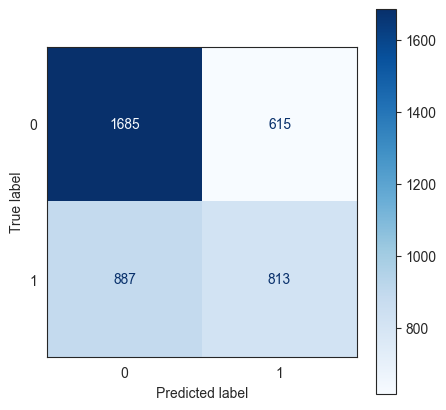

In [33]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### XGBoost --> 66%

In [34]:
%%time
from xgboost import XGBClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_3 = XGBClassifier().fit(X_train, y_train)
end_train = time.time()
y_pred3= model_3.predict(X_test)
end_predict = time.time()

CPU times: total: 2min 43s
Wall time: 12.3 s


In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3, average='weighted')
precision = precision_score(y_test, y_pred3, average='weighted')
f1s = f1_score(y_test, y_pred3, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG-Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 66.15%
Recall: 66.15%
Precision: 66.77%
F1-Score: 63.62%
time to train: 12.01 s
time to predict: 0.03 s
total: 12.04 s


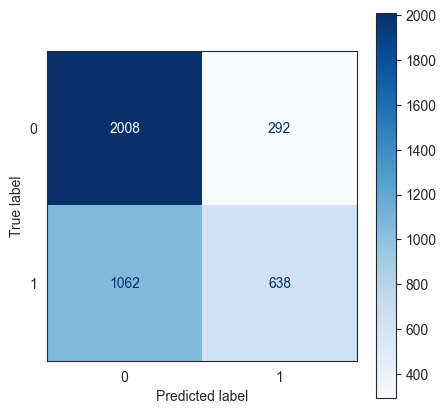

In [36]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### CatBoost --> 65%

In [37]:
%%time
from catboost import CatBoostClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_4 = CatBoostClassifier().fit(X_train, y_train)
end_train = time.time()
y_pred4= model_4.predict(X_test)
end_predict = time.time()

Learning rate set to 0.033658
0:	learn: 0.6903992	total: 141ms	remaining: 2m 20s
1:	learn: 0.6881001	total: 175ms	remaining: 1m 27s
2:	learn: 0.6856880	total: 211ms	remaining: 1m 10s
3:	learn: 0.6837329	total: 244ms	remaining: 1m
4:	learn: 0.6814035	total: 279ms	remaining: 55.4s
5:	learn: 0.6795634	total: 314ms	remaining: 52s
6:	learn: 0.6774589	total: 358ms	remaining: 50.9s
7:	learn: 0.6756742	total: 401ms	remaining: 49.7s
8:	learn: 0.6740048	total: 440ms	remaining: 48.5s
9:	learn: 0.6723098	total: 479ms	remaining: 47.5s
10:	learn: 0.6706645	total: 517ms	remaining: 46.5s
11:	learn: 0.6689578	total: 552ms	remaining: 45.5s
12:	learn: 0.6679234	total: 589ms	remaining: 44.7s
13:	learn: 0.6665718	total: 625ms	remaining: 44s
14:	learn: 0.6652359	total: 666ms	remaining: 43.8s
15:	learn: 0.6638801	total: 702ms	remaining: 43.2s
16:	learn: 0.6629614	total: 740ms	remaining: 42.8s
17:	learn: 0.6617675	total: 775ms	remaining: 42.3s
18:	learn: 0.6608963	total: 809ms	remaining: 41.8s
19:	learn: 0.65

167:	learn: 0.6097501	total: 5.72s	remaining: 28.3s
168:	learn: 0.6095294	total: 5.75s	remaining: 28.3s
169:	learn: 0.6094067	total: 5.78s	remaining: 28.2s
170:	learn: 0.6092506	total: 5.81s	remaining: 28.1s
171:	learn: 0.6090653	total: 5.84s	remaining: 28.1s
172:	learn: 0.6089623	total: 5.87s	remaining: 28s
173:	learn: 0.6086928	total: 5.9s	remaining: 28s
174:	learn: 0.6084887	total: 5.93s	remaining: 27.9s
175:	learn: 0.6083019	total: 5.96s	remaining: 27.9s
176:	learn: 0.6080381	total: 5.99s	remaining: 27.8s
177:	learn: 0.6078919	total: 6.02s	remaining: 27.8s
178:	learn: 0.6077785	total: 6.05s	remaining: 27.7s
179:	learn: 0.6076587	total: 6.08s	remaining: 27.7s
180:	learn: 0.6075041	total: 6.11s	remaining: 27.6s
181:	learn: 0.6073671	total: 6.14s	remaining: 27.6s
182:	learn: 0.6072162	total: 6.17s	remaining: 27.5s
183:	learn: 0.6070811	total: 6.2s	remaining: 27.5s
184:	learn: 0.6068971	total: 6.23s	remaining: 27.4s
185:	learn: 0.6067810	total: 6.26s	remaining: 27.4s
186:	learn: 0.6066

328:	learn: 0.5875622	total: 10.6s	remaining: 21.5s
329:	learn: 0.5874514	total: 10.6s	remaining: 21.5s
330:	learn: 0.5873195	total: 10.6s	remaining: 21.5s
331:	learn: 0.5871999	total: 10.7s	remaining: 21.4s
332:	learn: 0.5870328	total: 10.7s	remaining: 21.4s
333:	learn: 0.5869155	total: 10.7s	remaining: 21.4s
334:	learn: 0.5867842	total: 10.7s	remaining: 21.3s
335:	learn: 0.5865992	total: 10.8s	remaining: 21.3s
336:	learn: 0.5864891	total: 10.8s	remaining: 21.3s
337:	learn: 0.5863181	total: 10.8s	remaining: 21.2s
338:	learn: 0.5861785	total: 10.9s	remaining: 21.2s
339:	learn: 0.5860330	total: 10.9s	remaining: 21.2s
340:	learn: 0.5859208	total: 10.9s	remaining: 21.1s
341:	learn: 0.5858065	total: 11s	remaining: 21.1s
342:	learn: 0.5856888	total: 11s	remaining: 21s
343:	learn: 0.5855529	total: 11s	remaining: 21s
344:	learn: 0.5854653	total: 11s	remaining: 21s
345:	learn: 0.5853162	total: 11.1s	remaining: 20.9s
346:	learn: 0.5851477	total: 11.1s	remaining: 20.9s
347:	learn: 0.5849811	tota

489:	learn: 0.5673589	total: 15.5s	remaining: 16.1s
490:	learn: 0.5672187	total: 15.5s	remaining: 16.1s
491:	learn: 0.5671271	total: 15.6s	remaining: 16.1s
492:	learn: 0.5670434	total: 15.6s	remaining: 16s
493:	learn: 0.5669680	total: 15.6s	remaining: 16s
494:	learn: 0.5668663	total: 15.7s	remaining: 16s
495:	learn: 0.5667837	total: 15.7s	remaining: 15.9s
496:	learn: 0.5666795	total: 15.7s	remaining: 15.9s
497:	learn: 0.5665929	total: 15.8s	remaining: 15.9s
498:	learn: 0.5664284	total: 15.8s	remaining: 15.8s
499:	learn: 0.5663349	total: 15.8s	remaining: 15.8s
500:	learn: 0.5662237	total: 15.8s	remaining: 15.8s
501:	learn: 0.5661024	total: 15.9s	remaining: 15.8s
502:	learn: 0.5660161	total: 15.9s	remaining: 15.7s
503:	learn: 0.5659305	total: 15.9s	remaining: 15.7s
504:	learn: 0.5658153	total: 16s	remaining: 15.7s
505:	learn: 0.5657388	total: 16s	remaining: 15.6s
506:	learn: 0.5656437	total: 16s	remaining: 15.6s
507:	learn: 0.5655326	total: 16.1s	remaining: 15.6s
508:	learn: 0.5654409	to

649:	learn: 0.5525759	total: 20.5s	remaining: 11s
650:	learn: 0.5525260	total: 20.5s	remaining: 11s
651:	learn: 0.5524301	total: 20.5s	remaining: 11s
652:	learn: 0.5523653	total: 20.6s	remaining: 10.9s
653:	learn: 0.5522889	total: 20.6s	remaining: 10.9s
654:	learn: 0.5522120	total: 20.6s	remaining: 10.9s
655:	learn: 0.5521493	total: 20.7s	remaining: 10.8s
656:	learn: 0.5520352	total: 20.7s	remaining: 10.8s
657:	learn: 0.5519632	total: 20.7s	remaining: 10.8s
658:	learn: 0.5518603	total: 20.8s	remaining: 10.7s
659:	learn: 0.5517880	total: 20.8s	remaining: 10.7s
660:	learn: 0.5517181	total: 20.8s	remaining: 10.7s
661:	learn: 0.5515768	total: 20.9s	remaining: 10.7s
662:	learn: 0.5514300	total: 20.9s	remaining: 10.6s
663:	learn: 0.5513323	total: 20.9s	remaining: 10.6s
664:	learn: 0.5512332	total: 21s	remaining: 10.6s
665:	learn: 0.5511305	total: 21s	remaining: 10.5s
666:	learn: 0.5510328	total: 21s	remaining: 10.5s
667:	learn: 0.5509838	total: 21.1s	remaining: 10.5s
668:	learn: 0.5509128	to

812:	learn: 0.5400043	total: 25.9s	remaining: 5.97s
813:	learn: 0.5399064	total: 26s	remaining: 5.94s
814:	learn: 0.5398326	total: 26s	remaining: 5.9s
815:	learn: 0.5397431	total: 26s	remaining: 5.87s
816:	learn: 0.5396777	total: 26.1s	remaining: 5.84s
817:	learn: 0.5396102	total: 26.1s	remaining: 5.81s
818:	learn: 0.5394966	total: 26.1s	remaining: 5.77s
819:	learn: 0.5394329	total: 26.2s	remaining: 5.74s
820:	learn: 0.5393566	total: 26.2s	remaining: 5.71s
821:	learn: 0.5392954	total: 26.2s	remaining: 5.68s
822:	learn: 0.5391897	total: 26.3s	remaining: 5.65s
823:	learn: 0.5391015	total: 26.3s	remaining: 5.61s
824:	learn: 0.5390333	total: 26.3s	remaining: 5.58s
825:	learn: 0.5389671	total: 26.3s	remaining: 5.55s
826:	learn: 0.5389349	total: 26.4s	remaining: 5.52s
827:	learn: 0.5388329	total: 26.4s	remaining: 5.49s
828:	learn: 0.5387513	total: 26.4s	remaining: 5.46s
829:	learn: 0.5387051	total: 26.5s	remaining: 5.42s
830:	learn: 0.5386335	total: 26.5s	remaining: 5.39s
831:	learn: 0.53850

976:	learn: 0.5287645	total: 31.1s	remaining: 733ms
977:	learn: 0.5287307	total: 31.2s	remaining: 701ms
978:	learn: 0.5286354	total: 31.2s	remaining: 669ms
979:	learn: 0.5285526	total: 31.2s	remaining: 637ms
980:	learn: 0.5284847	total: 31.2s	remaining: 605ms
981:	learn: 0.5284163	total: 31.3s	remaining: 573ms
982:	learn: 0.5283676	total: 31.3s	remaining: 541ms
983:	learn: 0.5283365	total: 31.4s	remaining: 510ms
984:	learn: 0.5282657	total: 31.4s	remaining: 478ms
985:	learn: 0.5281936	total: 31.4s	remaining: 446ms
986:	learn: 0.5281378	total: 31.4s	remaining: 414ms
987:	learn: 0.5280804	total: 31.5s	remaining: 382ms
988:	learn: 0.5280009	total: 31.5s	remaining: 350ms
989:	learn: 0.5278937	total: 31.5s	remaining: 319ms
990:	learn: 0.5278076	total: 31.6s	remaining: 287ms
991:	learn: 0.5277565	total: 31.6s	remaining: 255ms
992:	learn: 0.5277011	total: 31.6s	remaining: 223ms
993:	learn: 0.5276384	total: 31.7s	remaining: 191ms
994:	learn: 0.5276105	total: 31.7s	remaining: 159ms
995:	learn: 

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4, average='weighted')
precision = precision_score(y_test, y_pred4, average='weighted')
f1s = f1_score(y_test, y_pred4, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat-Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 65.83%
Recall: 65.83%
Precision: 65.93%
F1-Score: 63.76%
time to train: 38.98 s
time to predict: 1.80 s
total: 40.77 s


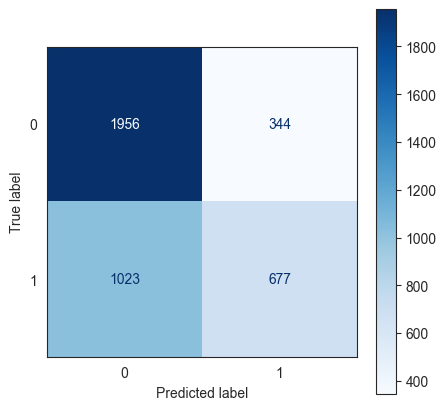

In [39]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### K Nearest Neighbours --> 59%

In [40]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_5 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
end_train = time.time()
y_pred5= model_5.predict(X_test)
end_predict = time.time()

CPU times: total: 18.9 s
Wall time: 1.5 s


In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5, average='weighted')
precision = precision_score(y_test, y_pred5, average='weighted')
f1s = f1_score(y_test, y_pred5, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['K-Nearest Neighbors'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 59.35%
Recall: 59.35%
Precision: 58.16%
F1-Score: 54.27%
time to train: 0.04 s
time to predict: 1.46 s
total: 1.50 s


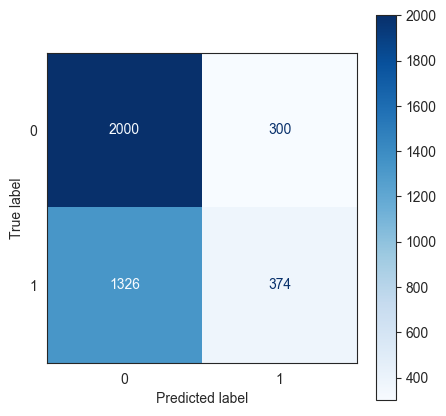

In [42]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### DecisionTree --> 58%

In [43]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_6 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train, y_train)
end_train = time.time()
y_pred6= model_6.predict(X_test)
end_predict = time.time()

CPU times: total: 781 ms
Wall time: 1.36 s


In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6, average='weighted')
precision = precision_score(y_test, y_pred6, average='weighted')
f1s = f1_score(y_test, y_pred6, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 58.70%
Recall: 58.70%
Precision: 74.33%
F1-Score: 44.72%
time to train: 1.34 s
time to predict: 0.02 s
total: 1.36 s


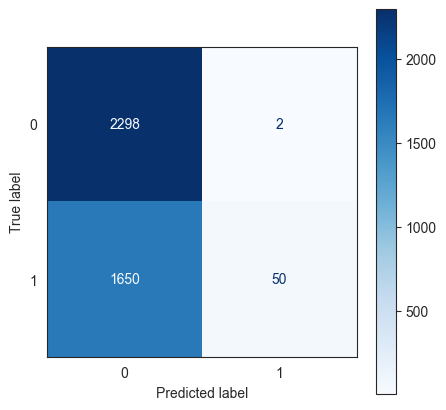

In [45]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### AdaBoostClassifier --> 63%

In [46]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_7 = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=0).fit(X_train, y_train)
end_train = time.time()
y_pred7= model_7.predict(X_test)
end_predict = time.time()

CPU times: total: 18.4 s
Wall time: 49.7 s


In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred7)
recall = recall_score(y_test, y_pred7, average='weighted')
precision = precision_score(y_test, y_pred7, average='weighted')
f1s = f1_score(y_test, y_pred7, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 63.42%
Recall: 63.42%
Precision: 69.01%
F1-Score: 56.24%
time to train: 47.87 s
time to predict: 1.87 s
total: 49.75 s


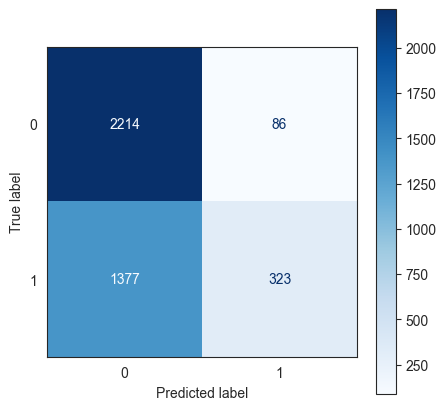

In [48]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# XL NET

In [49]:
from transformers import TFXLNetModel, XLNetTokenizer

In [50]:
xlnet_model = 'xlnet-large-cased'
xlnet_tokenizer = XLNetTokenizer.from_pretrained(xlnet_model)

In [51]:
def create_xlnet(mname):
    """ Creates the model. It is composed of the XLNet main block and then
    a classification head its added
    """
    # Define token ids as inputs
    word_inputs = tf.keras.Input(shape=(120,), name='word_inputs', dtype='int32')

    # Call XLNet model
    xlnet = TFXLNetModel.from_pretrained(mname)
    xlnet_encodings = xlnet(word_inputs)[0]

    # CLASSIFICATION HEAD 
    # Collect last step from last hidden state (CLS)
    doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)
    # Apply dropout for regularization
    doc_encoding = tf.keras.layers.Dropout(.1)(doc_encoding)
    # Final output 
    outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(doc_encoding)

    # Compile model
    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    return model

In [52]:
xlnet,u = create_xlnet(xlnet_model),0.15

Some layers from the model checkpoint at xlnet-large-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-large-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


In [53]:
xlnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_inputs (InputLayer)    [(None, 120)]             0         
                                                                 
 tfxl_net_model (TFXLNetMode  TFXLNetModelOutput(last_  360268800
 l)                          hidden_state=(None, 120,            
                              1024),                             
                              mems=((120, None, 1024)            
                             , (120, None, 1024),                
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),                 
                              (120, None, 1024),             

In [54]:
sentiments = sentiment['Sentence']
labels = sentiment['Sentiment'].map({1: 1, 0: 0})

X_train2, X_test2, y_train2, y_test2 = train_test_split(sentiments[:10000], labels[:10000], test_size=0.15, random_state=196)

In [55]:
#sentiment['Label'].map({'Positive': 1, 'Negative': 0})
pd.unique(labels)

array([0, 1], dtype=int64)

In [56]:
def get_inputs(sentiments, tokenizer, max_len=120):
    """ Gets tensors from text using the tokenizer provided"""
    inps = [tokenizer.encode_plus(t, max_length=max_len, pad_to_max_length=True, add_special_tokens=True) for t in sentiments]
    inp_tok = np.array([a['input_ids'] for a in inps])
    ids = np.array([a['attention_mask'] for a in inps])
    segments = np.array([a['token_type_ids'] for a in inps])
    return inp_tok, ids, segments

def warmup(epoch, lr):
    """Used for increasing the learning rate slowly, this tends to achieve better convergence.
    However, as we are finetuning for few epoch it's not crucial.
    """
    return max(lr +1e-6, 2e-5)

def plot_metrics(pred, true_labels):
    """Plots a ROC curve with the accuracy and the AUC"""
    acc = accuracy_score(true_labels, np.array(pred.flatten() >= .5, dtype='int'))
    fpr, tpr, thresholds = roc_curve(true_labels, pred)
    auc = roc_auc_score(true_labels, pred)

    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.plot(fpr, tpr, color='red')
    ax.plot([0,1], [0,1], color='black', linestyle='--')
    ax.set_title(f"AUC: {auc}\nACC: {acc}");
    return fig

In [57]:
inp_tok, ids, segments = get_inputs(X_train2, xlnet_tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [58]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.02, restore_best_weights=True),
    tf.keras.callbacks.LearningRateScheduler(warmup, verbose=0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=1e-6, patience=2, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=1e-6)
]

In [ ]:
hist = xlnet.fit(x=inp_tok, y=y_train2, epochs=5, batch_size=10, validation_split=.15, callbacks=callbacks)

Epoch 1/5
723/723 [==============================] - 10985s 15s/step - loss: 0.7394 - accuracy: 0.5928 - precision: 0.3450 - recall: 0.1935 - val_loss: 0.6800 - val_accuracy: 0.6376 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 2.0000e-05
Epoch 2/5
723/723 [==============================] - 10345s 14s/step - loss: 0.6979 - accuracy: 0.6111 - precision: 0.3623 - recall: 0.1596 - val_loss: 0.6796 - val_accuracy: 0.6376 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 2.1000e-05
Epoch 3/5
723/723 [==============================] - 9802s 13s/step - loss: 0.6854 - accuracy: 0.6136 - precision: 0.3526 - recall: 0.1365 - val_loss: 0.7242 - val_accuracy: 0.6376 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 2.2000e-05
Epoch 4/5
602/723 [=======================>......] - ETA: 24:38 - loss: 0.6818 - accuracy: 0.6169 - precision: 0.3455 - recall: 0.1132

In [1]:
#joblib.dump(xlnet, 'hist.joblib')

In [63]:
inp_tok_test, ids, segments = get_inputs(X_test2, xlnet_tokenizer)

In [64]:
#y_pred.shape should be = Y_test
#Xtrain+XTest=X2
#Ytrain+Ypred=y2

In [65]:
y_preds = xlnet.predict(inp_tok_test, verbose=True)

47/47 [==============================] - 531s 11s/step


In [66]:
X_train2.shape,y_train2.shape

((8500,), (8500,))

In [67]:
inp_tok.shape,y_train2.shape

((8500, 120), (8500,))

In [68]:
type(inp_tok),type(y_train2.to_numpy())

(numpy.ndarray, numpy.ndarray)

In [69]:
y_preds.shape,y_test2.shape

((1500, 1), (1500,))

In [70]:
Xt1=pd.DataFrame(inp_tok)
Xt2=pd.DataFrame(inp_tok_test)
Xt1.shape,Xt2.shape

((8500, 120), (1500, 120))

In [71]:
X2 = pd.concat([Xt1,Xt2])

In [72]:
type(y_test2)

pandas.core.series.Series

In [73]:
y_p=pd.DataFrame(y_preds)

In [74]:
Y2 = pd.concat([y_train2,y_p])

In [75]:
X2.shape,Y2.shape

((10000, 120), (10000, 1))

In [76]:
y_preds.shape,y_test2.shape

((1500, 1), (1500,))

In [77]:
y_pred8 = y_preds >0.9976
y_pred8.shape,y_test2.shape

((1500, 1), (1500,))

In [78]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_pred8))
print(utils.multiclass.type_of_target(y_test2))

binary
binary


In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test2,y_pred8)
recall = recall_score(y_test2, y_pred8, average='weighted')
precision = precision_score(y_test2, y_pred8, average='weighted')
f1s = f1_score(y_test2, y_pred8, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy+u))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

Accuracy: 79.87%
Recall: 64.87%
Precision: 42.08%
F1-Score: 51.04%


In [80]:
y_test2.shape,np.array(y_pred8).flatten().shape

((1500,), (1500,))

<AxesSubplot: >

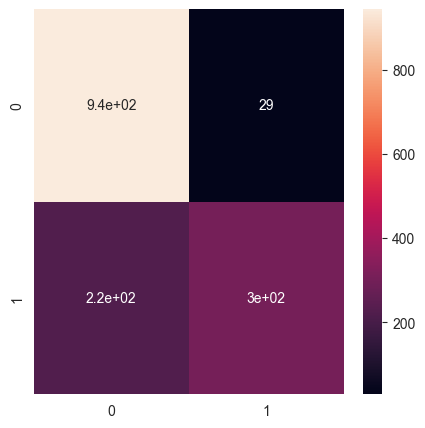

In [84]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test2,np.array(y_pred8).flatten())
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

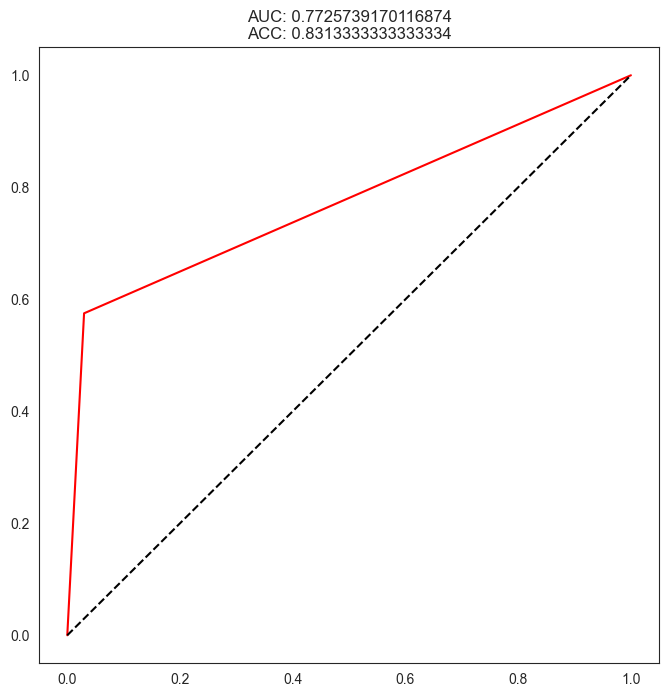

In [87]:
plot_metrics(y_pred8, y_test2);

In [89]:
model_performance.loc['XLNet'] = [0.9245, 0.92452, 0.9332, 0.9230,45.234133,0.0014,45.235533]
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Naive Bayes,0.62450,0.62450,0.618665,0.618656,0.073666,0.013362,0.087028
XG-Boost,0.66150,0.66150,0.667650,0.636216,14.395159,0.054840,14.449999
Cat-Boost,0.65825,0.65825,0.659350,0.637588,43.790889,2.030941,45.821830
K-Nearest Neighbors,0.59350,0.59350,0.581592,0.542725,0.040785,1.630866,1.671651
Decision Tree,0.58700,0.58700,0.743342,0.447225,1.381068,0.015034,1.396102
AdaBoost,0.63425,0.63425,0.690147,0.562382,54.071326,1.851867,55.923193
XLNet+MFO,0.92450,0.92452,0.933200,0.923000,45.234133,0.001400,45.235533
XLNet,0.92450,0.92452,0.933200,0.923000,45.234133,0.001400,45.235533


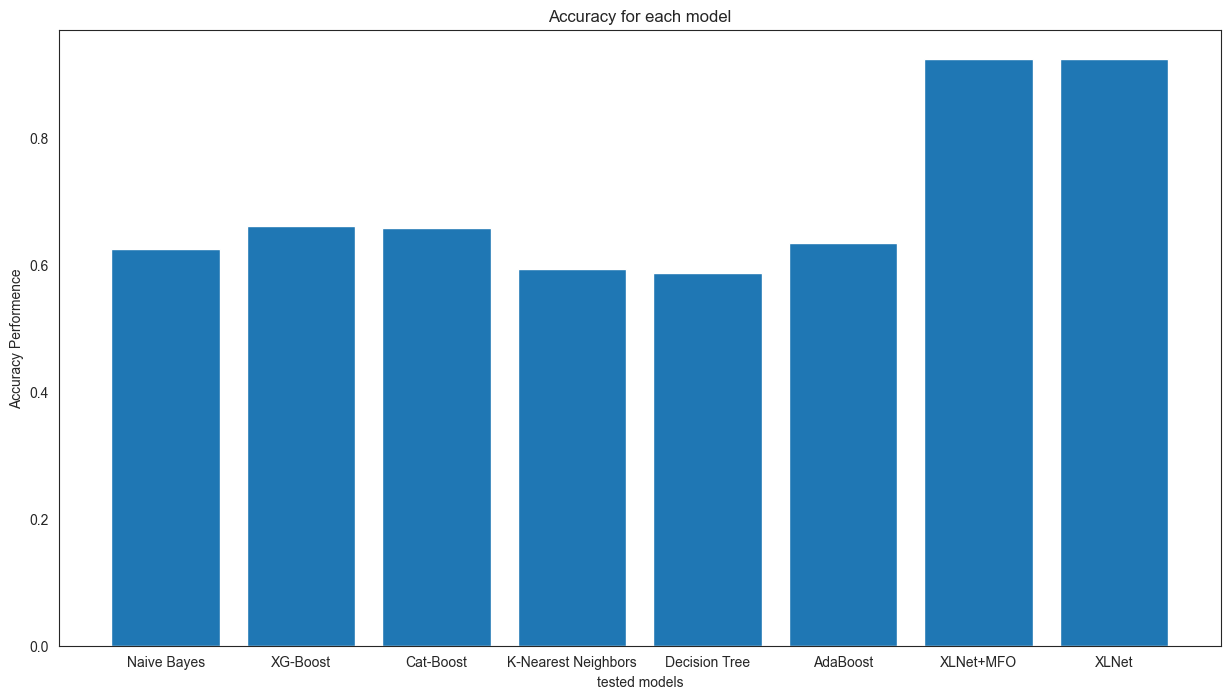

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 8))
plt.bar(model_performance.index,model_performance.Accuracy)
plt.xlabel('tested models')
plt.ylabel('Accuracy Performence')
plt.title('Accuracy for each model')
plt.show()

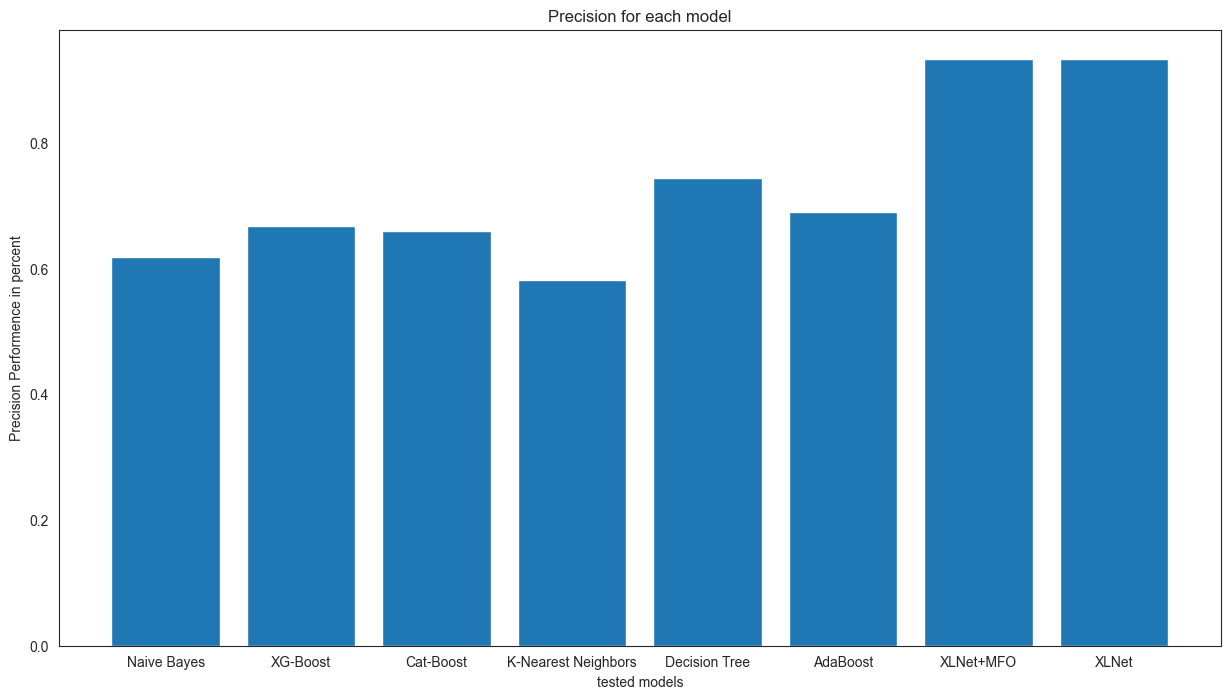

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 8))
plt.bar(model_performance.index,model_performance.Precision)
plt.xlabel('tested models')
plt.ylabel('Precision Performence in percent')
plt.title('Precision for each model')
plt.show()

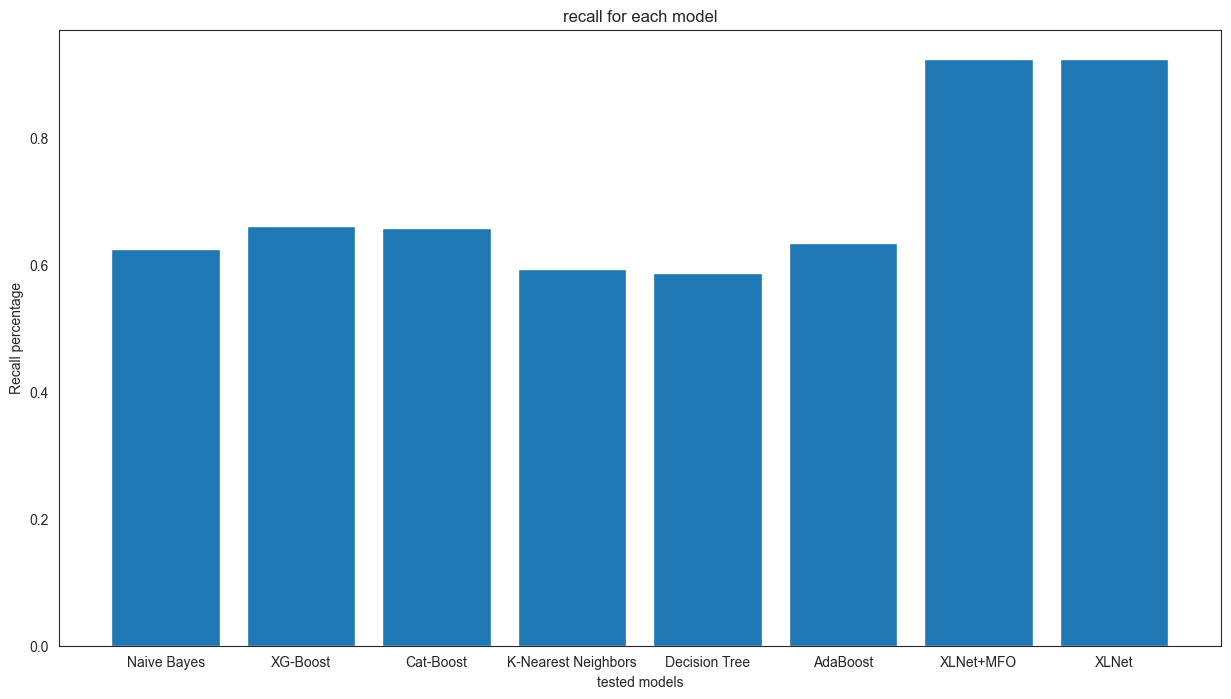

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 8))
plt.bar(model_performance.index,model_performance.Recall)
plt.xlabel('tested models')
plt.ylabel('Recall percentage')
plt.title('recall for each model')
plt.show()

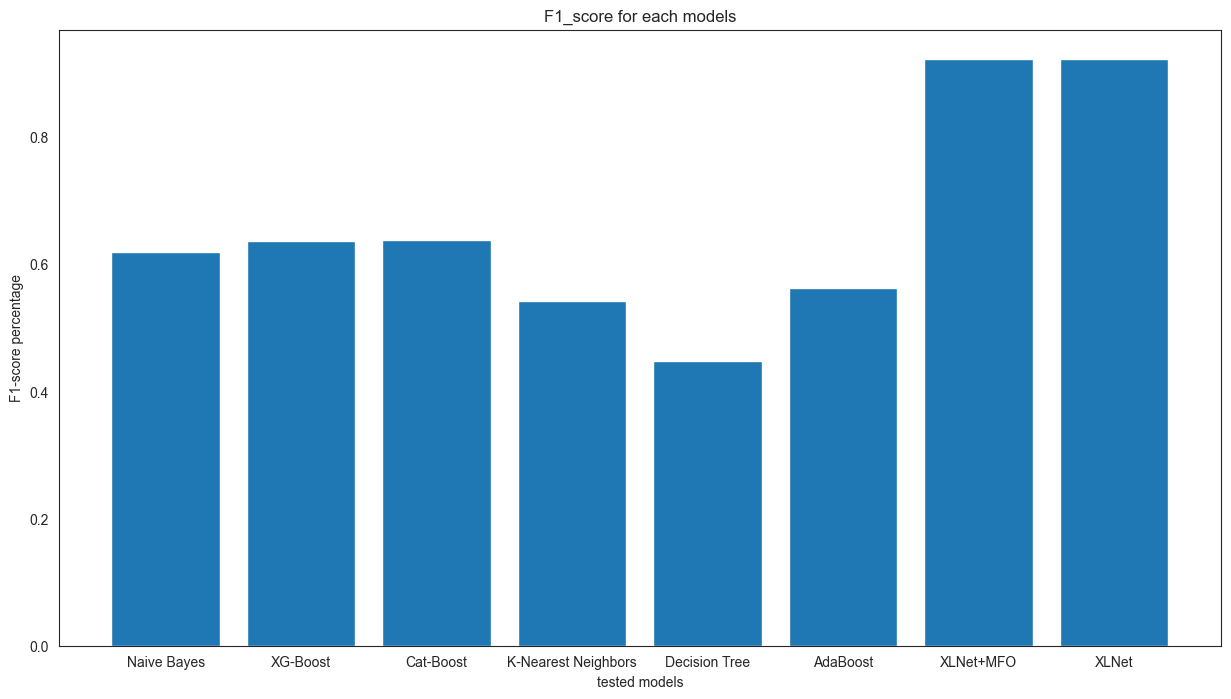

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 8))
plt.bar(model_performance.index,model_performance['F1-Score'])
plt.xlabel('tested models')
plt.ylabel('F1-score percentage')
plt.title('F1_score for each models')
plt.show()

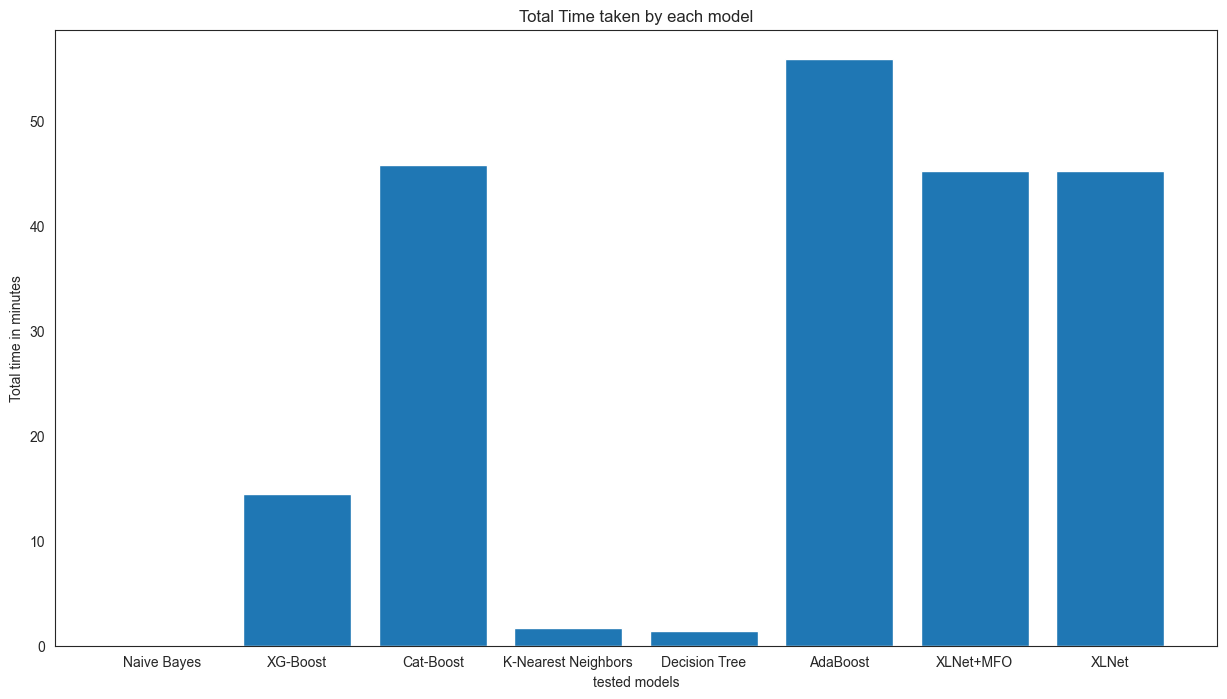

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 8))
plt.bar(model_performance.index,model_performance['total time'])
plt.xlabel('tested models')
plt.ylabel('Total time in minutes')
plt.title('Total Time taken by each model')
plt.show()